<ipython-input-1-ba5eab41a2e6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Date'] = pd.to_datetime(americas_df['Date'])
<ipython-input-1-ba5eab41a2e6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
<ipython-input-1-ba5eab41a2e6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

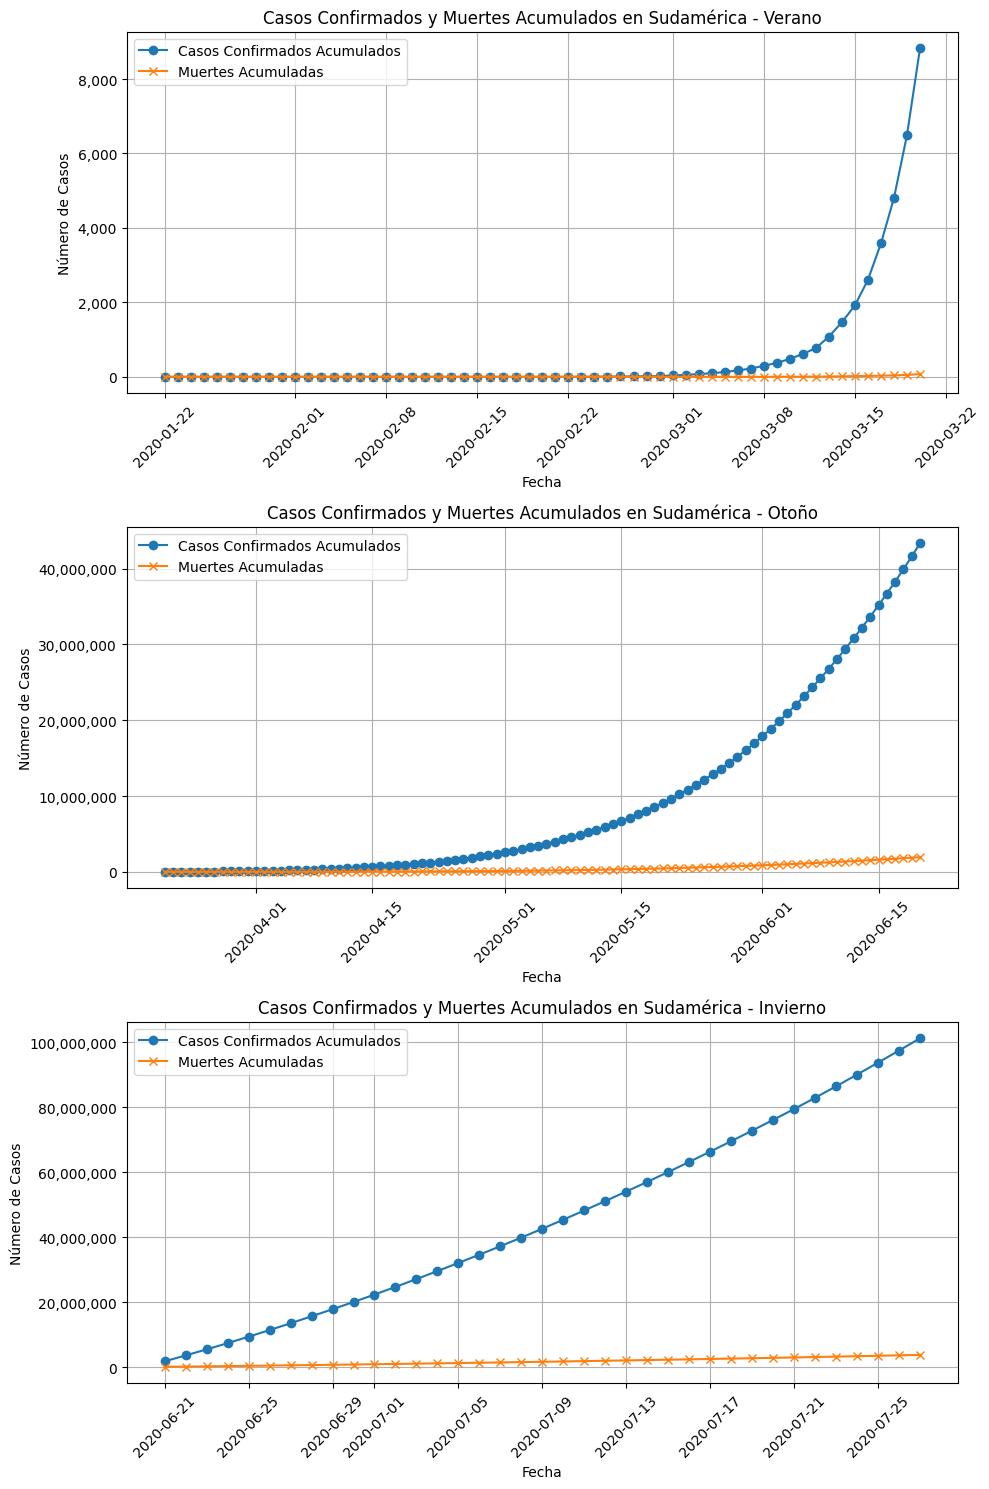

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

df = pd.read_csv('covid_19_clean_complete.csv')

americas_df = df[df['WHO Region'] == 'Americas']

americas_df['Date'] = pd.to_datetime(americas_df['Date'])

americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
americas_df['Deaths'] = americas_df['Deaths'].apply(lambda x: max(x, 0))

south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

south_america_df = americas_df[americas_df['Country/Region'].isin(south_american_countries)]

seasons = {
    'Verano': ('2020-01-22', '2020-03-20'),
    'Otoño': ('2020-03-21', '2020-06-20'),
    'Invierno': ('2020-06-21', '2020-07-27')
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for i, (season, (start_date, end_date)) in enumerate(seasons.items()):

    season_df = south_america_df[(south_america_df['Date'] >= start_date) & (south_america_df['Date'] <= end_date)]

    daily_data = season_df.groupby('Date').sum().reset_index()

    daily_data = daily_data.sort_values('Date')
    daily_data['Confirmed Accumulated'] = daily_data['Confirmed'].cumsum()
    daily_data['Deaths Accumulated'] = daily_data['Deaths'].cumsum()

    axes[i].plot(daily_data['Date'], daily_data['Confirmed Accumulated'], marker='o', label='Casos Confirmados Acumulados')
    axes[i].plot(daily_data['Date'], daily_data['Deaths Accumulated'], marker='x', label='Muertes Acumuladas')
    axes[i].set_title(f'Casos Confirmados y Muertes Acumulados en Sudamérica - {season}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Número de Casos')
    axes[i].legend()
    axes[i].grid(True)

    axes[i].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


<ipython-input-2-239e0269cecc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_america_df['Date'] = pd.to_datetime(south_america_df['Date'])
<ipython-input-2-239e0269cecc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_america_df['Confirmed'] = south_america_df['Confirmed'].apply(lambda x: max(x, 0))
<ipython-input-2-239e0269cecc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

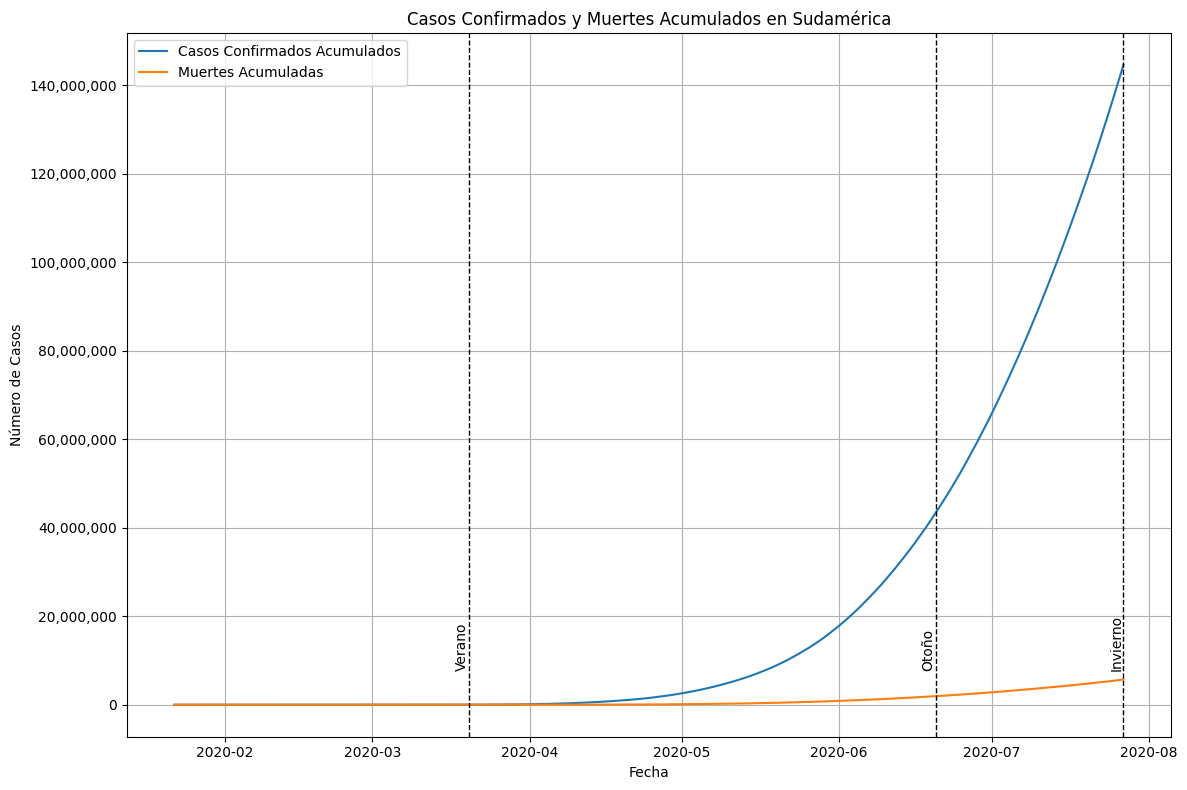

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

df = pd.read_csv('covid_19_clean_complete.csv')

americas_df = df[df['WHO Region'] == 'Americas']

south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

south_america_df = americas_df[americas_df['Country/Region'].isin(south_american_countries)]

south_america_df['Date'] = pd.to_datetime(south_america_df['Date'])

south_america_df['Confirmed'] = south_america_df['Confirmed'].apply(lambda x: max(x, 0))
south_america_df['Deaths'] = south_america_df['Deaths'].apply(lambda x: max(x, 0))

south_america_df = south_america_df.groupby('Date').sum().reset_index()

south_america_df = south_america_df.sort_values('Date')
south_america_df['Confirmed Accumulated'] = south_america_df['Confirmed'].cumsum()
south_america_df['Deaths Accumulated'] = south_america_df['Deaths'].cumsum()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(south_america_df['Date'], south_america_df['Confirmed Accumulated'], marker='', linestyle='-', label='Casos Confirmados Acumulados')
ax.plot(south_america_df['Date'], south_america_df['Deaths Accumulated'], marker='', linestyle='-', label='Muertes Acumuladas')

seasons = {
    'Verano': '2020-03-20',
    'Otoño': '2020-06-20',
    'Invierno': '2020-07-27'
}

for season, end_date in seasons.items():
    ax.axvline(pd.to_datetime(end_date), color='k', linestyle='--', lw=1)
    ax.text(pd.to_datetime(end_date), ax.get_ylim()[1]*0.05, season, rotation=90, verticalalignment='bottom', horizontalalignment='right')

ax.set_title('Casos Confirmados y Muertes Acumulados en Sudamérica')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de Casos')
ax.legend()
ax.grid(True)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

plt.show()
